# Load Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot

# Load Dataset

In [2]:
def load_data(path, headers):
    """
    Load dataset.

    Parameters
    ----------
    path : String
        The path of the dataset

    header : string
        The columns names.
    
    """
    #data = pd.read_csv('S&P_NearestNeighbors.csv', names = headers)
    data = pd.read_csv(path, names = headers)
    # Total number of records
    n_records = data.shape[0]
    # Print the results
    print ("Total number of records: {}".format(n_records))
    return data

# Exploratory Analysis

## Describe data and visualize distributions

In [3]:
def exp_analysis(data_path, headers, predicted_var):
    """
    Describe data and visualize distributions.

    Parameters
    ----------
    data_path : String
        Holds the path of the dataset.
    
    headers = List
        Holds the header names.

    """
    %matplotlib inline
    
    # Load dataset
    data = load_data(path, headers)
    
    # Exploratory analysis
    display(data.describe())
    
    # Scatter plot    
    pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (20,20), diagonal = 'kde');
    
    # Date vs Predicted variable plot
    data.plot(x='Date', y=predicted_var)
    
    
    

Total number of records: 2476


,Open,High,Low,Close,Volume,Lagged_Close,Moving_Average_200,50,10,252-day_High,252-day_Low,Target
count,2476.000000,2476.000000,2476.000000,2476.000000,2.476000e+03,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000
mean,1678.167710,1688.944972,1666.954968,1679.114701,1.728916e+06,1678.393780,1622.252278,1663.795376,1675.903243,1774.203352,1402.337641,-0.000136
std,527.014135,527.195351,526.966236,527.271483,7.168841e+05,527.060461,484.051214,518.915392,525.931927,475.520164,485.082767,0.001568
min,675.750000,694.750000,665.750000,675.750000,3.521800e+04,675.750000,865.810000,785.610000,707.130000,1067.500000,675.750000,-0.025261
25%,1222.625000,1232.437500,1208.687500,1222.875000,1.266525e+06,1222.437500,1221.515000,1209.977500,1219.155000,1363.500000,1011.750000,-0.000290
50%,1661.625000,1672.250000,1652.625000,1664.500000,1.642008e+06,1662.625000,1535.990000,1643.880000,1657.175000,1703.250000,1351.500000,-0.000105
75%,2081.000000,2092.500000,2069.750000,2082.750000,2.096600e+06,2082.562500,2041.825000,2065.585000,2077.962500,2128.750000,1825.500000,0.000126
max,2874.250000,2878.500000,2851.500000,2874.750000,6.273863e+06,2874.750000,2633.730000,2750.550000,2837.050000,2874.750000,2408.500000,0.017358


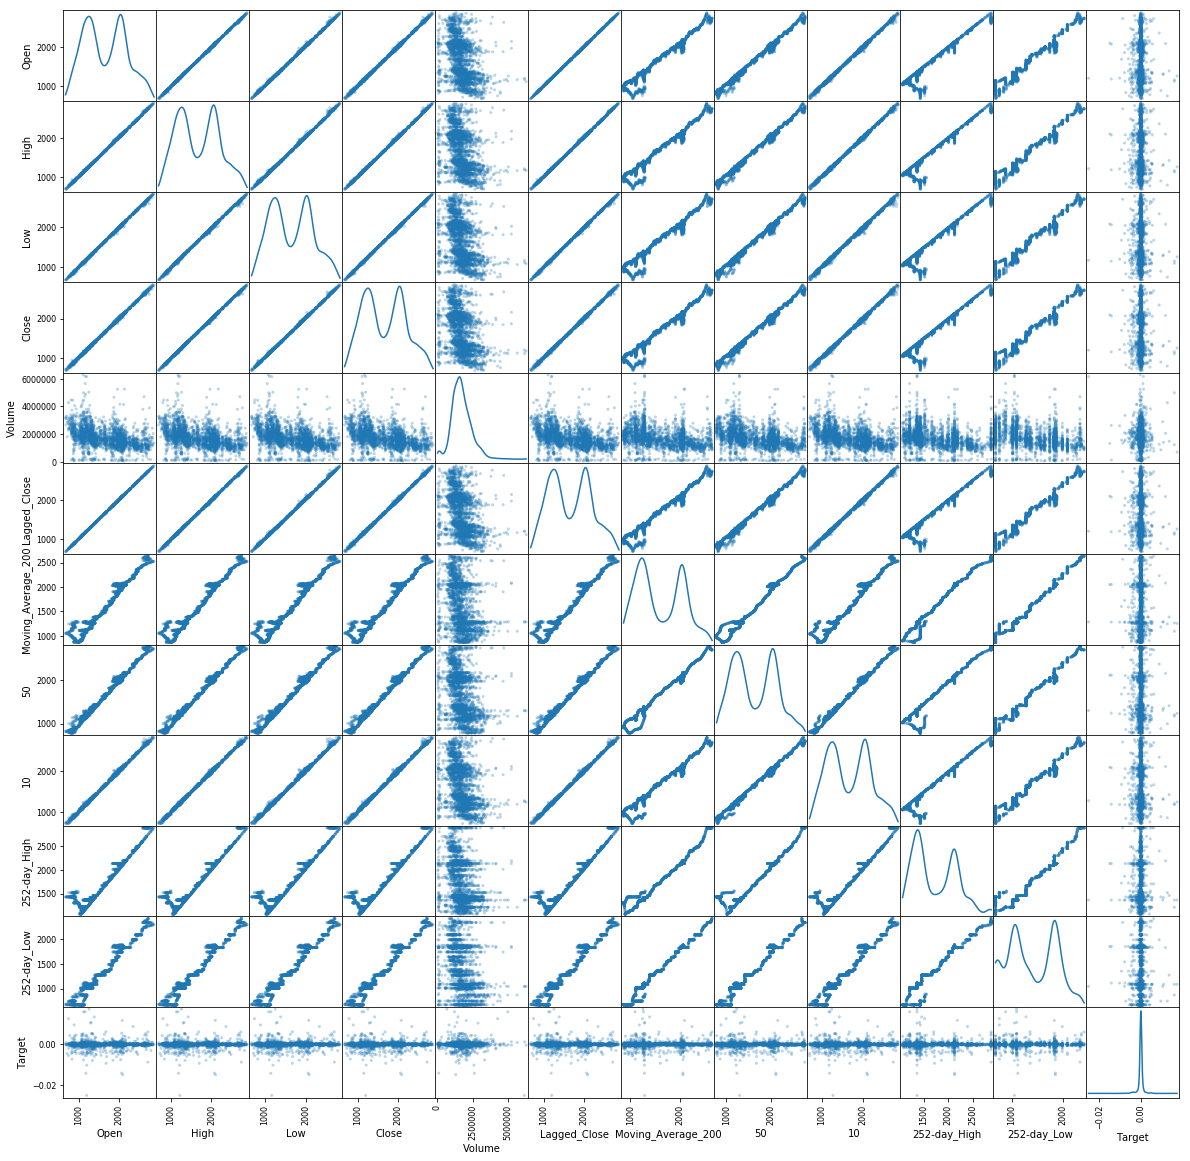

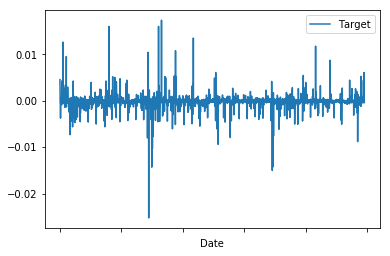

In [5]:
path = 'S&P_NearestNeighbors.csv'
headers = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Lagged_Close', 'Moving_Average_200', '50', '10', '252-day_High', '252-day_Low', 'Target']
predicted_var = 'Target'
exp_analysis(path,headers,predicted_var)

## Visualization

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_performance(title,predicted_test, y_test):
    """
    Generate a simple plot of the test set.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    predicted_test : array-like
        Holds the predictions made by the fitted model.

    y_test : array-like.
        Holds the actual values of the test set.

    """
    %matplotlib inline
    plt.plot(predicted_test)
    plt.plot(y_test)
    plt.title(title)
    plt.legend(['Actual Values', 'Predicted'])
    plt.show()   
    
    """ 
    fig, ax = plt.subplots()
    #ax.scatter(y_train, predicted_train, edgecolors=(0, 0, 0))
    ax.scatter(y_test, predicted_test, edgecolors=(0, 0, 0))
    ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4,linestyle = 'None')
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')
    plt.title(title)
    plt.show()
    """
    return plt

## Feature engineering

In [7]:
def feature_creation(data):
    """
    Create new features from date

    Parameters
    ----------
    data : Dataframe
        Holds the data.

    """
    # Split the dates into individual predictors
    data['Month'], data['Day'], data['Year'] = zip(*data['Date'].map(lambda x: x.split('/')))
    return data

## Cyclical Transformation

In [8]:
def cyclic_tranformation(data):
    """
    Performs cyclic transformation to the features created from the date column (Day, month).

    Parameters
    ----------
    data : Dataframe
        Holds the data.

    """
    # Convert String series to int
    data['Month'] = pd.to_numeric(data['Month'])
    data['Day'] = pd.to_numeric(data['Day'])
    data['Year'] = pd.to_numeric(data['Year'])
    # Transform date into cyclical features
    data['month_sin'] = np.sin((data.Month - 1)*(2.*np.pi/12))
    data['month_cos'] = np.cos((data.Month - 1)*(2.*np.pi/12))
    data['day_sin'] = np.sin((2.*np.pi)/30*data.Day)
    data['day_cos'] = np.cos((2.*np.pi)/30*data.Day)
    ax = data.plot.scatter('day_sin', 'day_cos').set_aspect('equal') # Plot cyclic Results
    return data

# Feature Scaling

In [9]:
from sklearn.preprocessing import StandardScaler
"""
    Scales the data using standarization.

    Parameters
    ----------
    data : Dataframe
        Holds the data.
    cols : Dataframe
        Holds the columns.

"""
def scaler(data, cols):    
    data[cols] = StandardScaler().fit_transform(data[cols])
    display(data.head(5))
    return data

## Seperate features from predicted variables

In [10]:


def feature_target_sep(data):
    """
    Seperate features and target variables.

    Parameters
    ----------
    data : Dataframe
        Holds the data.
    """
    features = data.iloc[:, :-1].values
    target   = data.iloc[:,-1].values
    
    return [features, target]

## Shuffle and Split Data

In [18]:
# Import train_test_split
from sklearn.model_selection import train_test_split

def train_test(features, target):
    """
    Splits the dataset into train-test sets.

    Parameters
    ----------
    features : array
        Holds the predictors.
    features : array
        Holds the predicted value.
    """
    # Split features and target variables into training and testins sets
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 0, shuffle = False)

    # Display the results of the split
    print( "Training set: {} samples".format(X_train.shape[0]))
    print("Testing samples: {} samples".format(X_test.shape[0]))
    
    return [X_train, y_train, X_test, y_test]

## k-Nearest Neighbours Training 

### Hyper-parameter tunning - Grid Search 

In [12]:
def preprocessing(data):
    """
    Pre-process the dataset before training.

    Parameters
    ----------
    data : Dataframe
        Holds the data.
    
    """
    data = feature_creation(data)
    data = cyclic_tranformation(data)    
    data.drop(columns = ['Date','Month','Day'], inplace = True)
    data = data.set_index(['month_sin','month_cos','day_sin','day_cos','Year']).reset_index()
    display(data.head(5))
    return data

In [13]:
# Construction of hyper parameters grid to tune
params_knn = {   
                 'n_neighbors' : np.arange(1, 50, 2),
                 'weights' : ['uniform', 'distance'],
                 'algorithm' : ['ball_tree','kd_tree','brute'],
                 'leaf_size' : np.arange(30, 90, 5),
                 'p' : np.arange(1, 20, 1),
                 'metric' : ['euclidean','manhattan','chebyshev','minkowski']
             }

params_svr = {
                 'kernel' : ['linear','rbf','sigmoid'],
                 'degree' : np.arange(3,15,1),
                 'coef0' : [0.01,0.02],
                 'shrinking' : [True,False],
                 'tol' : [1e-3,1e-5,1e-7,1e-10],
                 'max_iter' : [150],
                  'C' : [1.0,2.0,3.0],
                 'epsilon' : [0.001]
             }


In [14]:
import time


def param_tune(estimator, params, X_train, y_train, cv = 10):
    """
    Hyper-parameter optimization.

    Parameters
    ----------
    estimator : object
        Holds the model.
    params : dictionary
        Holds the grid.
    X_train : array
        Holds the features.
    y_train : array
        Holds the predicted value.
    """
    if (estimator.__class__.__name__ == 'KNeighborsRegressor'):
        # Gridsearch for hyper-parameter tuning
        grid_search = RandomizedSearchCV(estimator, params, cv = cv)
        start = time.time()
        grid_search.fit(X_train, y_train)
    else:
        grid_search = GridSearchCV(estimator, params, cv=cv)
        start = time.time()
        grid_search.fit(X_train, y_train)
        
    print("[INFO] randomized search took {:.2f} seconds".format(time.time() - start))
    print("[INFO] randomized search best parameters: {}".format(grid_search.best_params_))
    return grid_search.best_params_

In [15]:
def evaluation(clf, y_true, y_pred):
    """
    Evaluates the performance of the models.

    Parameters
    ----------
    clf : object
        Holds the model.
    
    y_true : array
        Holds the actual values.
    y_pred : array
        Holds the predicted values.
    """
    print("Evaluation using the test set...")
    rmse = sqrt(mean_squared_error(y_true, y_pred))
    print("RMSE {:.7f}".format(rmse))

In [16]:
def evaluation_second(clf, path, headers, columns):
    """
    Evaluates the performance of the models using the second dataset.

    Parameters
    ----------
    clf : object
        Holds the model.
    
    path : String
        Holds the destination of the dataset.
    headers : List
        Holds the column names of the dataset.
    columns : List
        Holds the column names that are standarized.
    """
    print("Evaluation using the validation set...")
    data = load_data(path, headers)
    display(data.head(5))
    data = preprocessing(data)
    data_scaled = scaler(data, columns)
    features, target = feature_target_sep(data_scaled)
    y_hat = clf.predict(features)
    rmse = sqrt(mean_squared_error(target, y_hat))
    print("RMSE {:.7f}".format(rmse))
    title = clf.__class__.__name__       
    plot_performance(title, y_hat, target)
    

In [19]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score,RandomizedSearchCV, GridSearchCV
import matplotlib.pyplot as plt
from math import sqrt
import time
import warnings

def train_predict(estimators):
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on       
    '''
    warnings.filterwarnings('ignore', 'Solver terminated early.*')
     
    if (estimators[0].__class__.__name__ == 'KNeighborsRegressor'):
        
        # k-NearestNeighbors
        print("Loading data for k-NN...")
        header_names = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Lagged_Close', 'Moving_Average_200', '50', '10', '252-day_High', '252-day_Low', 'Target']
        data = load_data('S&P_NearestNeighbors.csv', header_names)
        data = preprocessing(data)
        columns = ['Open','High','Low','Close','Volume','Lagged_Close','Moving_Average_200','50','10','252-day_High','252-day_Low']
        #data_scaled = scaler(data, columns)
        #display(data_scaled.head(5))
        
        # Split the dataset into train and test sets
        features, target = feature_target_sep(data) # Feature-Predicted variable split
        X_train, y_train, X_test, y_test = train_test(features, target) # Train-tst split
        
        # Hyper-parameter tunning and fitting
        best_params_knn = param_tune(estimators[0], params_knn, X_train, y_train) # Hyper-parameter optimization
        knn = KNeighborsRegressor(weights = best_params_knn['weights'], p= best_params_knn['p'], n_neighbors= best_params_knn['n_neighbors'], metric= best_params_knn['metric'], leaf_size = best_params_knn['leaf_size'], algorithm = best_params_knn['algorithm'] ,n_jobs = -1)
        y_hat = knn.fit(X_train, y_train).predict(X_test) # Train-Predict 
        
        # Visualization       
        title = estimators[0].__class__.__name__ # Model's title       
        plot_performance(title, y_hat, y_test)
        
        
        # Print results
        results = cross_val_score(knn, X_train, y_train, cv=10, scoring='neg_mean_squared_error') # Cross-validation score
        print ('CV Scoring Result: mean=',np.mean(results),'std=',np.std(results)) # Score print
        evaluation(knn, y_test, y_hat) # Evaluate performance
        evaluation_second(knn, "DAX_NearestNeighbors.csv",header_names, columns) # Evaluate perofmrance with the second dataset
        
    if (estimators[1].__class__.__name__ == 'SVR'): 
        # SVR
        print("Loading data for SVR...")
        header_names = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
        data = load_data('ES.csv',header_names)
        data = preprocessing(data)
        columns = ['Open','High','Low','Close']
        #data_scaled = scaler(data, columns)
        #display(data_scaled.head(5))
        
        # Split the dataset into train and test sets
        features, target = feature_target_sep(data) # Feature-Predicted variable split
        X_train, y_train, X_test, y_test = train_test(features, target) # Train-test split
        
        # Hyper-parameter tunning and fitting
        best_params_svr = param_tune(estimators[1], params_svr, X_train, y_train) # Hyper-parameter optimization
        svr = SVR(kernel = best_params_svr['kernel'], degree = best_params_svr['degree'], gamma = 0.001, coef0 = best_params_svr['coef0'], C = best_params_svr['C'], epsilon = best_params_svr['epsilon'], shrinking = best_params_svr['shrinking'], max_iter = best_params_svr['max_iter'], tol = best_params_svr['tol'])
        y_hat = svr.fit(X_train, y_train).predict(X_test) # Train-Predict
        
        # Visualization
        title = estimators[1].__class__.__name__        
        plot_performance(title, y_hat, y_test)
 
        
        # Print results
        results = cross_val_score(svr, X_train, y_train, cv=10, scoring='neg_mean_squared_error')# Cross-validation score 
        print ('CV Scoring Result: mean=',np.mean(results),'std=',np.std(results)) # Score print
        evaluation(svr, y_test, y_hat) # Evaluate performance
        evaluation_second(svr, "VIX.csv",header_names, columns) # Evaluate perofmrance with the second dataset
        
    
    
    

Loading data for k-NN...
Total number of records: 2476


,month_sin,month_cos,day_sin,day_cos,Year,Open,High,Low,Close,Volume,Lagged_Close,Moving_Average_200,50,10,252-day_High,252-day_Low,Target
0,-1.0,-1.836970e-16,-0.406737,-0.913545,2008,940.50,987.75,908.0,933.25,3817972.0,940.50,1300.61,1183.91,963.78,1553.25,888.75,0.004554
1,-1.0,-1.836970e-16,-0.866025,-0.500000,2008,937.50,992.75,925.5,990.25,2422341.0,933.25,1298.52,1177.61,957.45,1553.25,888.75,0.000252
2,-1.0,-1.836970e-16,-0.951057,-0.309017,2008,990.50,992.75,951.0,959.75,2635980.0,990.25,1296.22,1170.97,952.90,1553.25,888.75,-0.000260
3,-1.0,-1.836970e-16,-0.994522,-0.104528,2008,959.50,969.25,872.5,904.50,3282389.0,959.75,1293.80,1163.37,945.33,1525.00,888.75,-0.000276
4,-1.0,-1.836970e-16,-0.994522,0.104528,2008,904.25,923.25,856.0,915.75,4052586.0,904.50,1291.50,1155.81,945.58,1525.00,888.75,-0.000273


Training set: 1980 samples
Testing samples: 496 samples
[INFO] randomized search took 23.99 seconds
[INFO] randomized search best parameters: {'weights': 'uniform', 'p': 14, 'n_neighbors': 33, 'metric': 'manhattan', 'leaf_size': 35, 'algorithm': 'kd_tree'}


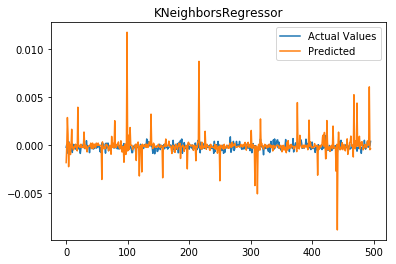

CV Scoring Result: mean= -2.834847531120893e-06 std= 1.9337568111384447e-06
Evaluation using the test set...
RMSE 0.0011856
Evaluation using the validation set...
Total number of records: 3786


,Date,Open,High,Low,Close,Volume,Lagged_Close,Moving_Average_200,50,10,252-day_High,252-day_Low,Target
0,07/01/2003,3215.0,3223.5,3133.0,3164.5,95498.0,3228.5,2933.05,3040.80,3233.85,4504.0,2201.0,0.015958
1,07/02/2003,3215.0,3260.0,3198.5,3256.0,85839.0,3164.5,2932.46,3046.54,3228.75,4504.0,2201.0,-0.004607
2,07/03/2003,3241.0,3279.0,3210.5,3245.0,85378.0,3256.0,2932.09,3052.06,3229.85,4504.0,2201.0,-0.000462
3,07/04/2003,3243.5,3262.5,3227.0,3258.0,19987.0,3245.0,2931.98,3058.98,3229.35,4464.5,2201.0,0.008594
4,07/07/2003,3286.0,3374.0,3286.0,3364.5,81196.0,3258.0,2933.11,3069.17,3244.95,4395.0,2201.0,-0.002229


,month_sin,month_cos,day_sin,day_cos,Year,Open,High,Low,Close,Volume,Lagged_Close,Moving_Average_200,50,10,252-day_High,252-day_Low,Target
0,1.224647e-16,-1.0,0.207912,0.978148,2003,3215.0,3223.5,3133.0,3164.5,95498.0,3228.5,2933.05,3040.80,3233.85,4504.0,2201.0,0.015958
1,1.224647e-16,-1.0,0.406737,0.913545,2003,3215.0,3260.0,3198.5,3256.0,85839.0,3164.5,2932.46,3046.54,3228.75,4504.0,2201.0,-0.004607
2,1.224647e-16,-1.0,0.587785,0.809017,2003,3241.0,3279.0,3210.5,3245.0,85378.0,3256.0,2932.09,3052.06,3229.85,4504.0,2201.0,-0.000462
3,1.224647e-16,-1.0,0.743145,0.669131,2003,3243.5,3262.5,3227.0,3258.0,19987.0,3245.0,2931.98,3058.98,3229.35,4464.5,2201.0,0.008594
4,1.224647e-16,-1.0,0.994522,0.104528,2003,3286.0,3374.0,3286.0,3364.5,81196.0,3258.0,2933.11,3069.17,3244.95,4395.0,2201.0,-0.002229


,month_sin,month_cos,day_sin,day_cos,Year,Open,High,Low,Close,Volume,Lagged_Close,Moving_Average_200,50,10,252-day_High,252-day_Low,Target
0,1.224647e-16,-1.0,0.207912,0.978148,2003,-1.604637,-1.616234,-1.619862,-1.624263,-0.584497,-1.599470,-1.676163,-1.662687,-1.597120,-1.309390,-1.634942,0.015958
1,1.224647e-16,-1.0,0.406737,0.913545,2003,-1.604637,-1.602466,-1.594913,-1.589597,-0.772491,-1.623724,-1.676395,-1.660492,-1.599057,-1.309390,-1.634942,-0.004607
2,1.224647e-16,-1.0,0.587785,0.809017,2003,-1.594785,-1.595299,-1.590343,-1.593764,-0.781463,-1.589048,-1.676540,-1.658382,-1.598639,-1.309390,-1.634942,-0.000462
3,1.224647e-16,-1.0,0.743145,0.669131,2003,-1.593838,-1.601523,-1.584058,-1.588839,-2.054170,-1.593217,-1.676584,-1.655736,-1.598829,-1.323715,-1.634942,0.008594
4,1.224647e-16,-1.0,0.994522,0.104528,2003,-1.577735,-1.559465,-1.561585,-1.548489,-0.862858,-1.588290,-1.676139,-1.651840,-1.592906,-1.348920,-1.634942,-0.002229


RMSE 0.0055067


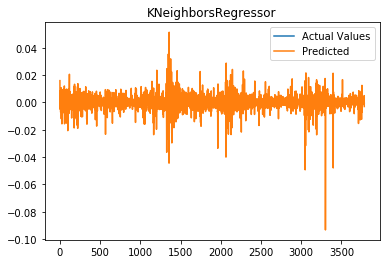

Loading data for SVR...
Total number of records: 2728


,month_sin,month_cos,day_sin,day_cos,Year,Open,High,Low,Close,Volume
0,-1.000000,-1.836970e-16,-2.079117e-01,0.978148,2007,1542.00,1551.00,1540.75,1547.25,1014248
1,-1.000000,-1.836970e-16,-2.449294e-16,1.000000,2007,1547.50,1548.00,1534.75,1536.25,1021116
2,-1.000000,-1.836970e-16,2.079117e-01,0.978148,2007,1536.25,1558.75,1533.75,1553.25,1952396
3,-0.866025,5.000000e-01,2.079117e-01,0.978148,2007,1552.75,1555.00,1510.50,1516.00,2475316
4,-0.866025,5.000000e-01,4.067366e-01,0.913545,2007,1515.75,1525.00,1496.75,1517.75,2721441


Training set: 2182 samples
Testing samples: 546 samples
[INFO] randomized search took 2767.19 seconds
[INFO] randomized search best parameters: {'C': 3.0, 'coef0': 0.01, 'degree': 3, 'epsilon': 0.001, 'kernel': 'rbf', 'max_iter': 150, 'shrinking': True, 'tol': 0.001}


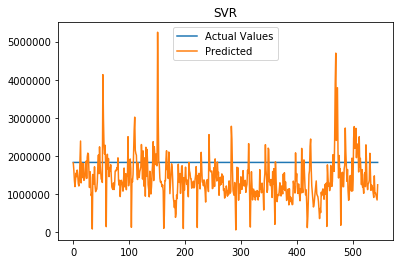

CV Scoring Result: mean= -607542649566.6936 std= 356360421676.05
Evaluation using the test set...
RMSE 693904.3157126
Evaluation using the validation set...
Total number of records: 2660


,Date,Open,High,Low,Close,Volume
0,10/29/2007,19.93,20.24,19.54,19.87,0
1,10/30/2007,20.46,21.15,20.31,21.07,0
2,10/31/2007,20.53,22.09,18.30,18.53,0
3,11/1/2007,19.89,24.15,17.38,23.21,0
4,11/2/2007,22.56,25.17,22.56,23.01,0


,month_sin,month_cos,day_sin,day_cos,Year,Open,High,Low,Close,Volume
0,-1.000000,-1.836970e-16,-2.079117e-01,0.978148,2007,19.93,20.24,19.54,19.87,0
1,-1.000000,-1.836970e-16,-2.449294e-16,1.000000,2007,20.46,21.15,20.31,21.07,0
2,-1.000000,-1.836970e-16,2.079117e-01,0.978148,2007,20.53,22.09,18.30,18.53,0
3,-0.866025,5.000000e-01,2.079117e-01,0.978148,2007,19.89,24.15,17.38,23.21,0
4,-0.866025,5.000000e-01,4.067366e-01,0.913545,2007,22.56,25.17,22.56,23.01,0


,month_sin,month_cos,day_sin,day_cos,Year,Open,High,Low,Close,Volume
0,-1.000000,-1.836970e-16,-2.079117e-01,0.978148,2007,-0.020827,-0.081359,0.039146,-0.015717,0
1,-1.000000,-1.836970e-16,-2.449294e-16,1.000000,2007,0.033096,0.005620,0.123278,0.106880,0
2,-1.000000,-1.836970e-16,2.079117e-01,0.978148,2007,0.040218,0.095466,-0.096340,-0.152616,0
3,-0.866025,5.000000e-01,2.079117e-01,0.978148,2007,-0.024897,0.292364,-0.196861,0.325511,0
4,-0.866025,5.000000e-01,4.067366e-01,0.913545,2007,0.246755,0.389856,0.369119,0.305078,0


RMSE 1831734.1849946


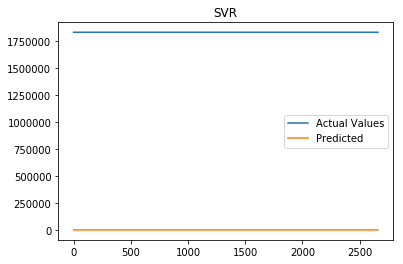

In [20]:
knn = KNeighborsRegressor()
svr = SVR()
classifiers = [knn, svr]
train_predict(classifiers)